## Parte 1 
(imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Coordenadas cromáticas

In [2]:
img_1 = cv.imread('./TP1/coord_cromaticas/CoordCrom_1.png')
img_2 = cv.imread('./TP1/coord_cromaticas/CoordCrom_2.png')
img_3 = cv.imread('./TP1/coord_cromaticas/CoordCrom_3.png')

In [3]:

def chrom_coord(image):
    image_float = image.astype(np.float32)

    r,g,b = cv.split(image_float)

    # normalizo valores rgb, sumo un valor pequelño para evitar dividir por cero
    sum_rgb = r+g+b + 1e-10 
    r_normalizado = r / sum_rgb
    g_normalizado = g /sum_rgb
    b_normalizado = b / sum_rgb

    img_normalizada = cv.merge([r_normalizado, g_normalizado, b_normalizado])

    return img_normalizada


In [4]:
def plot_chrom_coord(image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(chrom_coord(image), cv.COLOR_BGR2RGB))
    plt.title('Pasaje a coordenadas cromáticas')
    plt.axis('off')

    plt.show()

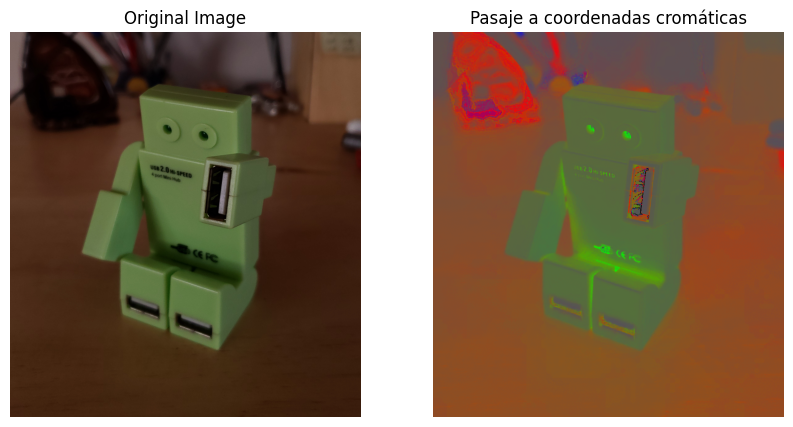

In [5]:
plot_chrom_coord(img_2)

## White patch

In [6]:
img_4 = cv.imread('./TP1/white_patch/test_blue.png')
img_5 = cv.imread('./TP1/white_patch/test_green.png')
img_6 = cv.imread('./TP1/white_patch/test_red.png')
img_7 = cv.imread('./TP1/white_patch/wp_green.png')
img_8 = cv.imread('./TP1/white_patch/wp_red.png')
img_9 = cv.imread('./TP1/white_patch/wp_blue.jpg')
img_10 = cv.imread('./TP1/white_patch/wp_green2.jpg')
img_11 = cv.imread('./TP1/white_patch/wp_red2.jpg')

In [12]:
imagenes = [img_4, img_5, img_6, img_7, img_8, img_9, img_10, img_11]

In [7]:
def white_patch(image):
    image_float = image.astype(np.float32)
    
    r,g,b = cv.split(image_float)

    max_r = np.max(r)
    max_g = np.max(g)
    max_b = np.max(b)

    r_normalizado = r / max_r
    g_normalizado = g / max_g
    b_normalizado = b / max_b

    img_normalizada = cv.merge([r_normalizado, g_normalizado, b_normalizado])

    return img_normalizada

In [8]:
def plot_white_patch(image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(white_patch(image), cv.COLOR_BGR2RGB))
    plt.title('White Patch Corrected Image')
    plt.axis('off')

    plt.show()

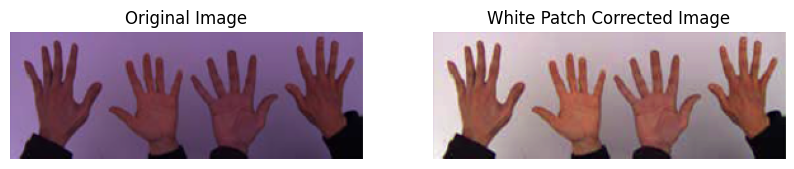

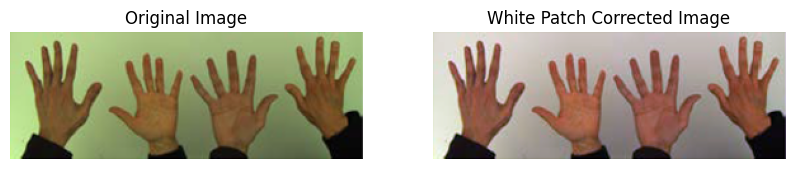

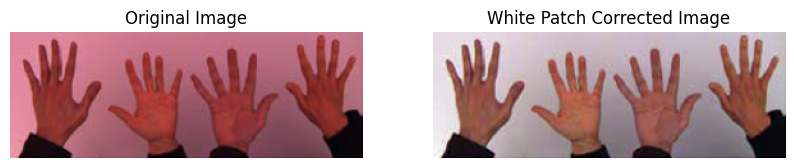

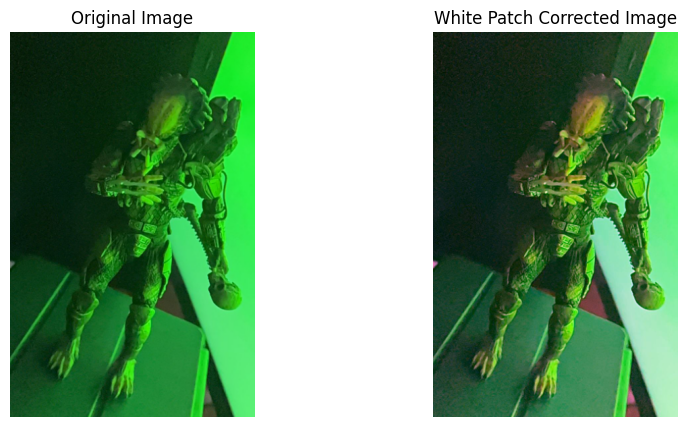

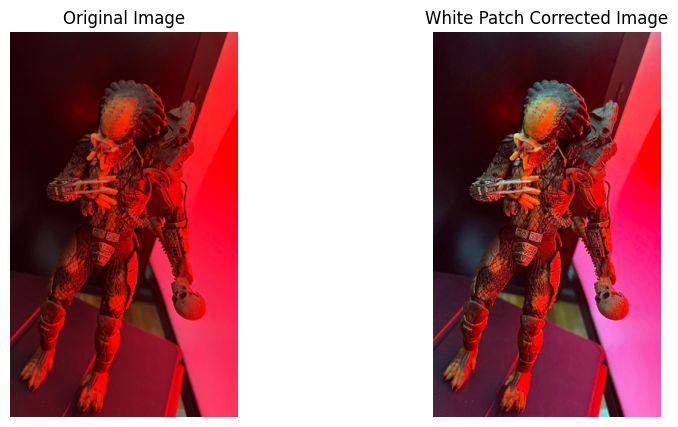

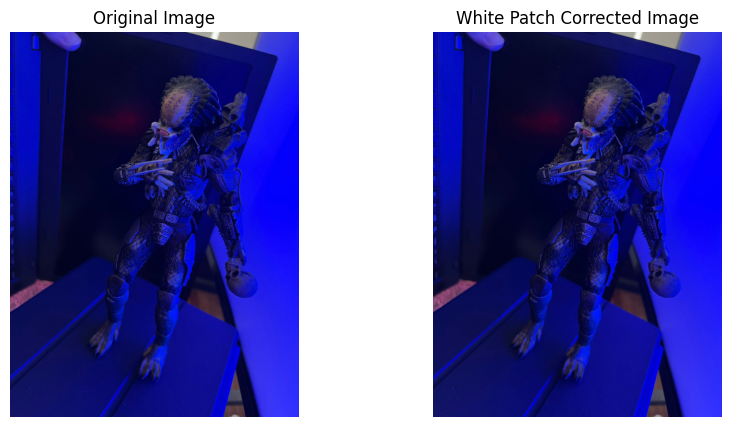

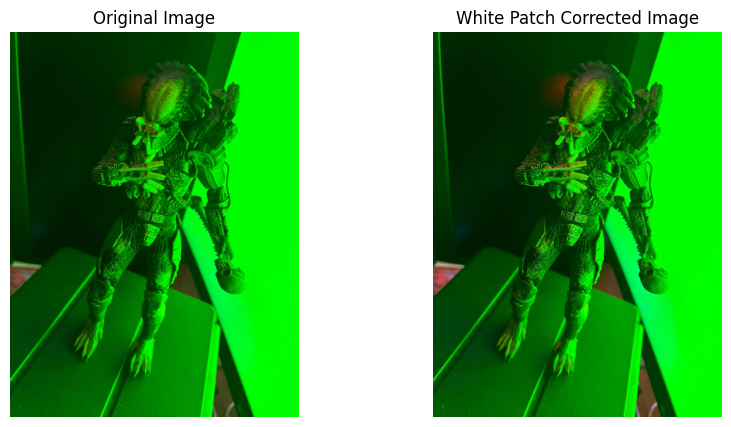

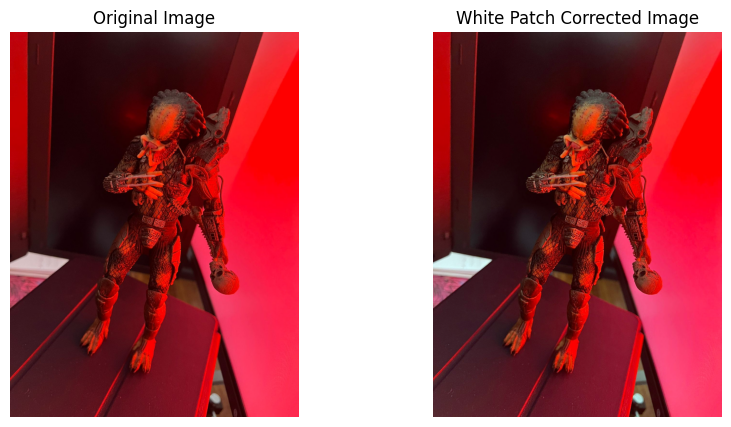

In [13]:
for img in imagenes:
    plot_white_patch(img)

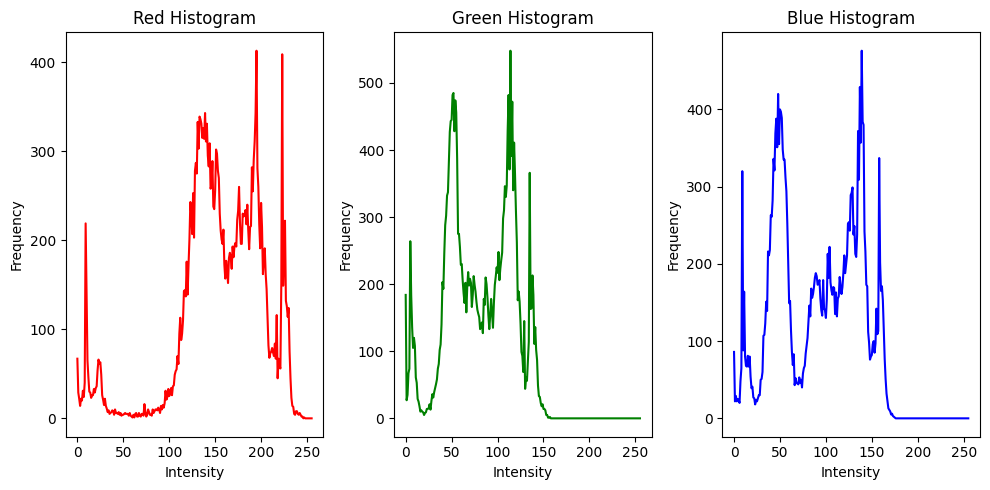

In [18]:
import numpy as np
import matplotlib.pyplot as plt

image_rgb = cv.cvtColor(img_6, cv.COLOR_BGR2RGB)

r, g, b = cv.split(image_rgb)

hist_r = cv.calcHist([r], [0], None, [256], [0,256])
hist_g = cv.calcHist([g], [0], None, [256], [0,256])
hist_b = cv.calcHist([b], [0], None, [256], [0,256])

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(hist_r, color='red')
plt.title('Red Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.plot(hist_g, color='green')
plt.title('Green Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.plot(hist_b, color='blue')
plt.title('Blue Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Observacion

El algoritmo de whitepatch parece funcionar un poco mejor cuando los canales r,g,b estan mas balanceados en las imagenes. Por el contrario, cuando hay mas predominancia de un canal (y casi nulos los otros) como es el caso de las imagenes *wp* el algoritmo genera cambios imperceptibles o casi nulos. 